Customer Shopping (Latest Trends) Data Set https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset
- Goal: To investigate how customer demographics, seasonal trends, and ppurhcasing patterns affect purchasing decisions.

The ages of male customers range from:  70  to  18
The ages of female customers range from:  70  to  18

The average age of male customers is:  44.0972850678733
The average age of female customers is:  44.00721153846154

The median age of male customers is:  44.0
The median age of female customers is:  44.0

The mode age of male customers is:  54
The mode age of female customers is:  45



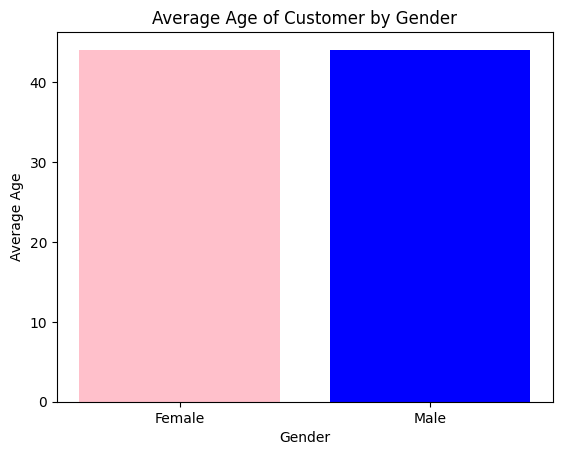

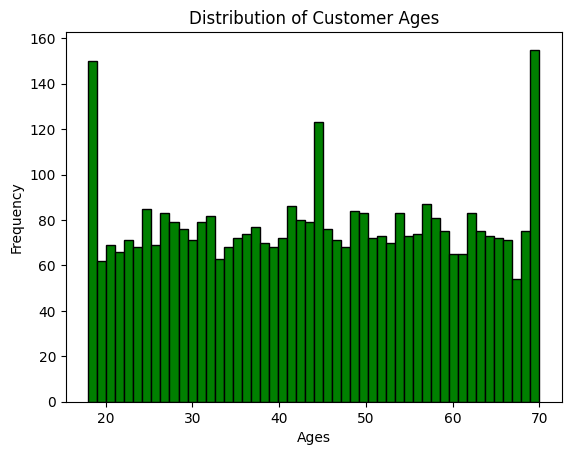

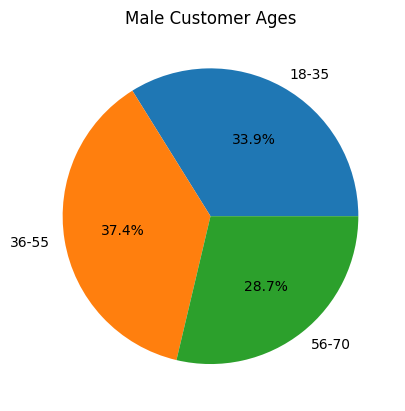

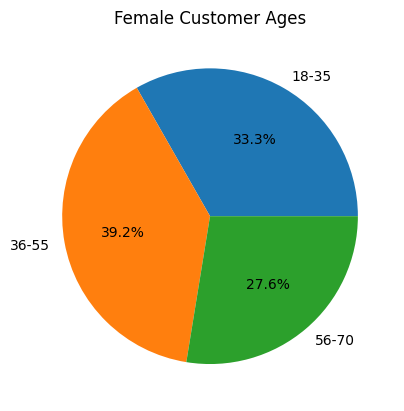

In [ ]:
#Finding the average age of customers by gender, the range of customers, the median, and the mode.

import statistics
import csv
import numpy as np
import matplotlib.pyplot as plt

fileName = "/content/shopping_trends.csv"
male_ages = []
female_ages = []
customer_ages = []
maleAges18T35 = []
maleAges36T55 = []
maleAges55T70 = []
femaleAges18T35 = []
femaleAges36T55 = []
femaleAges55T70 = []

with open(fileName, 'r') as file:
  scanner = csv.reader(file)
  next(scanner) #to skip the header (first line)

  for values in scanner:
    if len(values) > 0:
      customer_ages.append(int(values[1]))
      if values[2] == "Male":
        male_ages.append(int(values[1]))
      else:
        female_ages.append(int(values[1]))

  file.seek(0)
  next(scanner)

  for values in scanner:
    if len(values) > 0:
      if values[2] == "Male":
        if 18 <= int(values[1]) <= 35:
          maleAges18T35.append(int(values[1]))
        elif 36 <= int(values[1]) <= 55:
          maleAges36T55.append(int(values[1]))
        else:
          maleAges55T70.append(int(values[1]))
      else:
        if 18 <= int(values[1]) <= 35:
          femaleAges18T35.append(int(values[1]))
        elif 36 <= int(values[1]) <= 55:
          femaleAges36T55.append(int(values[1]))
        else:
          femaleAges55T70.append(int(values[1]))

#making it into np arrays
male_ages = np.array(male_ages)
female_ages = np.array(female_ages)
customer_ages = np.array(customer_ages)

maleAvg = np.mean(male_ages)
femaleAvg = np.mean(female_ages)
maleHighestAge = np.max(male_ages)
maleLowestAge = np.min(male_ages)
femaleHighesrAge = np.max(female_ages)
femaleLowestAge = np.min(female_ages)

#printing the results (means)
print("The ages of male customers range from: ", maleHighestAge, " to ", maleLowestAge)
print("The ages of female customers range from: ", femaleHighesrAge, " to ", femaleLowestAge)
print()
print("The average age of male customers is: ", maleAvg)
print("The average age of female customers is: ", femaleAvg)
print()
print("The median age of male customers is: ", np.median(male_ages))
print("The median age of female customers is: ", np.median(female_ages))
print()
print("The mode age of male customers is: ", statistics.mode(male_ages))
print("The mode age of female customers is: ", statistics.mode(female_ages))
print()

#creating the bar chart to demonstrate
plt.bar(["Female", "Male"], [femaleAvg, maleAvg], color=["pink","blue"])
plt.xlabel("Gender")
plt.ylabel("Average Age")
plt.title("Average Age of Customer by Gender")
plt.show()
print()

#creating histogram to demonstrate variety of ages
plt.hist(customer_ages, bins=50, color = 'green', edgecolor='black')
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Ages")
plt.show()
print()

#creating pie charts to demonstrate variety of ages based on gender
plt.pie([len(maleAges18T35), len(maleAges36T55), len(maleAges55T70)], labels=["18-35","36-55", "56-70"], autopct='%1.1f%%')
plt.title("Male Customer Ages")
plt.labels = ["18-35","36-55", "56-70"]
plt.show()
print()
plt.pie([len(femaleAges18T35), len(femaleAges36T55), len(femaleAges55T70)], labels=["18-35","36-55", "56-70"], autopct='%1.1f%%')
plt.title("Female Customer Ages")
plt.labels = ["18-35","36-55", "56-70"]
plt.show()
print()

Mean purchase amount for Ages 18-25: 60.65
Mean purchase amount for Ages 60+: 59.51
Correlation between Age and Purchase Amount (Ages 18-25): 0.04
Correlation between Age and Purchase Amount (Ages 60+): -0.01


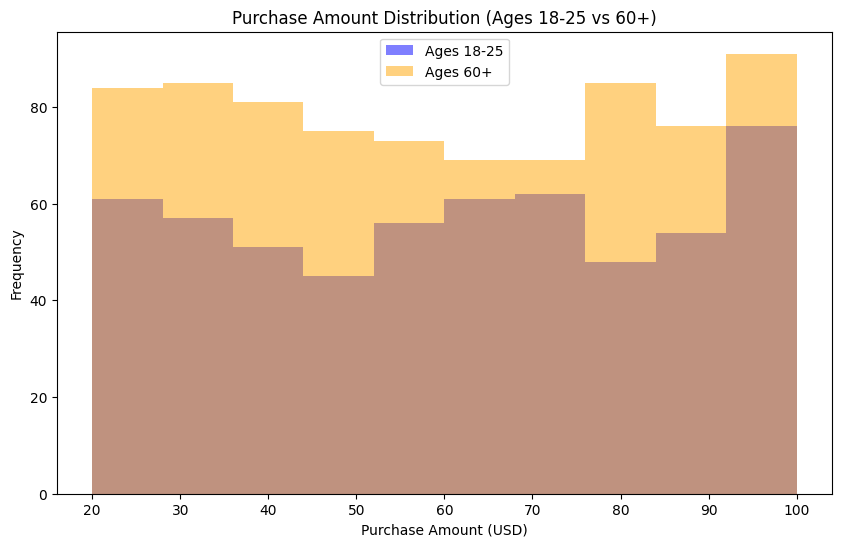

In [ ]:
# Investigating if there is a correlation between ages and purchase power by dividing customer into two
# age groups
# Do older people spend more money than younger people?

import csv
import numpy as np
import matplotlib.pyplot as plt

fileName = "/content/shopping_trends.csv"

# Lists to store age and purchase amounts for the two age groups
age_18_25 = []
purchase_amount_18_25 = []

age_60_plus = []
purchase_amount_60_plus = []

# Reading the data
with open(fileName, "r") as file:
    scanner = csv.reader(file)
    next(scanner)  # Skip the header

    for values in scanner:
        if len(values) > 0:
            age = int(values[1])
            purchase_amount = float(values[5])

            # Add to corresponding age group
            if 18 <= age <= 25:
                age_18_25.append(age)
                purchase_amount_18_25.append(purchase_amount)
            elif age >= 60:
                age_60_plus.append(age)
                purchase_amount_60_plus.append(purchase_amount)

# Convert to NumPy arrays for easier analysis
age_18_25 = np.array(age_18_25)
purchase_amount_18_25 = np.array(purchase_amount_18_25)

age_60_plus = np.array(age_60_plus)
purchase_amount_60_plus = np.array(purchase_amount_60_plus)

# Calculate mean purchase amounts
mean_18_25 = np.mean(purchase_amount_18_25)
mean_60_plus = np.mean(purchase_amount_60_plus)

print(f"Mean purchase amount for Ages 18-25: {mean_18_25:.2f}")
print(f"Mean purchase amount for Ages 60+: {mean_60_plus:.2f}")

# Calculate the correlation for each group
corr_18_25 = np.corrcoef(age_18_25, purchase_amount_18_25)[0, 1]
corr_60_plus = np.corrcoef(age_60_plus, purchase_amount_60_plus)[0, 1]

# Output the correlation coefficients
print(f"Correlation between Age and Purchase Amount (Ages 18-25): {corr_18_25:.2f}")
print(f"Correlation between Age and Purchase Amount (Ages 60+): {corr_60_plus:.2f}")

# Create the histogram plot
plt.figure(figsize=(10, 6))

# Histogram for ages 18-25
plt.hist(purchase_amount_18_25, bins=10, color='blue', alpha=0.5, label='Ages 18-25')

# Histogram for ages 60+
plt.hist(purchase_amount_60_plus, bins=10, color='orange', alpha=0.5, label='Ages 60+')

# Titles and labels
plt.title('Purchase Amount Distribution (Ages 18-25 vs 60+)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Display the plot
plt.show()

Male Ages 18-35 Clothing Purchases:  419
Male Ages 18-35 Accessories Purchases:  287
Male Ages 18-35 Footwear Purchases:  124
Male Ages 18-35 Outerwear Purchases:  68
Male Ages 36-55 Clothing Purchases:  415
Male Ages 36-55 Accessories Purchases:  316
Male Ages 36-55 Footwear Purchases:  172
Male Ages 36-55 Outerwear Purchases:  90
Male Ages 56-70 Clothing Purchases:  347
Male Ages 56-70 Accessories Purchases:  245
Male Ages 56-70 Footwear Purchases:  104
Male Ages 56-70 Outerwear Purchases:  65

Female Ages 18-35 Clothing Purchases:  187
Female Ages 18-35 Accessories Purchases:  128
Female Ages 18-35 Footwear Purchases:  63
Female Ages 18-35 Outerwear Purchases:  37
Female Ages 36-55 Clothing Purchases:  225
Female Ages 36-55 Accessories Purchases:  150
Female Ages 36-55 Footwear Purchases:  80
Female Ages 36-55 Outerwear Purchases:  34
Female Ages 56-70 Clothing Purchases:  144
Female Ages 56-70 Accessories Purchases:  114
Female Ages 56-70 Footwear Purchases:  56
Female Ages 56-70 O

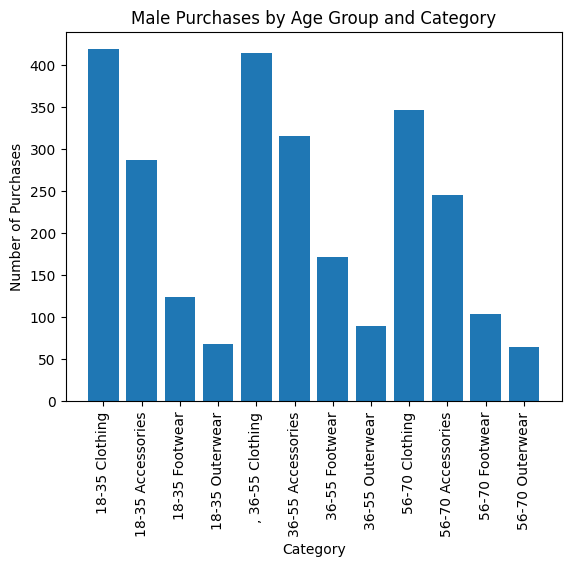

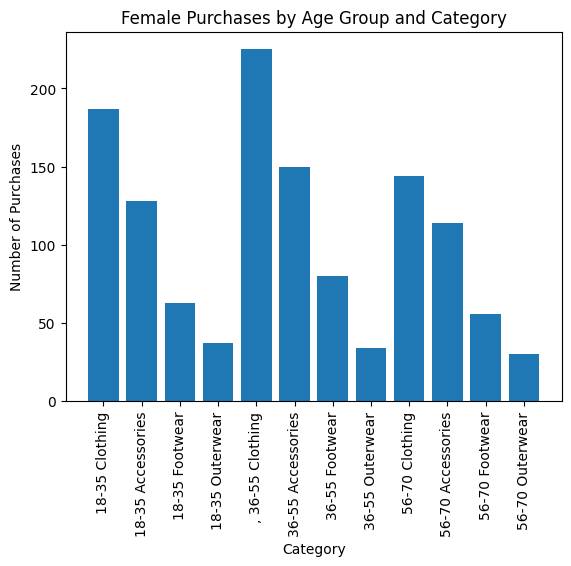


Differences between men and women shopping tendancies: 
Z-Test for Clothing:
Z-statistic: 0.66, P-value: 0.5120
No significant difference in proportions (p >= 0.05).

Z-Test for Accessories:
Z-statistic: 0.53, P-value: 0.5931
No significant difference in proportions (p >= 0.05).

Z-Test for Footwear:
Z-statistic: -0.51, P-value: 0.6117
No significant difference in proportions (p >= 0.05).

Z-Test for Outerwear:
Z-statistic: -0.72, P-value: 0.4709
No significant difference in proportions (p >= 0.05).



In [ ]:
#Do different age groups tend to buy from specific item categories

import statistics
import csv
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest


fileName = "/content/shopping_trends.csv"
maleCategories = []
femaleCategories = []
maleAges18T35_clothing = []
maleAges18T35_accesories = []
maleAges18T35_footwear = []
maleAges18T35_outerwear = []
maleAges36T55_clothing = []
maleAges36T55_accesories = []
maleAges36T55_footwear = []
maleAges36T55_outerwear = []
maleAges56T70_clothing = []
maleAges56T70_accesories = []
maleAges56T70_footwear = []
maleAges56T70_outerwear = []
femaleAges18T35_clothing = []
femaleAges18T35_accesories = []
femaleAges18T35_footwear = []
femaleAges18T35_outerwear = []
femaleAges36T55_clothing = []
femaleAges36T55_accesories = []
femaleAges36T55_footwear = []
femaleAges36T55_outerwear = []
femaleAges56T70_clothing = []
femaleAges56T70_accesories = []
femaleAges56T70_footwear = []
femaleAges56T70_outerwear = []

with open(fileName, 'r') as file:
  scanner = csv.reader(file)
  next(scanner) #to skip the header (first line)

  for values in scanner:
    if len(values) > 0:
      if values[2] == "Male":
        if 18 <= int(values[1]) <= 35:
          if values[4] == "Clothing":
            maleAges18T35_clothing.append(int(values[1]))
          elif values[4] == "Accessories":
            maleAges18T35_accesories.append(int(values[1]))
          elif values[4] == "Footwear":
            maleAges18T35_footwear.append(int(values[1]))
          elif values[4] == "Outerwear":
            maleAges18T35_outerwear.append(int(values[1]))
        elif 36 <= int(values[1]) <= 55:
          if values[4] == "Clothing":
            maleAges36T55_clothing.append(int(values[1]))
          elif values[4] == "Accessories":
            maleAges36T55_accesories.append(int(values[1]))
          elif values[4] == "Footwear":
            maleAges36T55_footwear.append(int(values[1]))
          elif values[4] == "Outerwear":
            maleAges36T55_outerwear.append(int(values[1]))
        else:
          if values[4] == "Clothing":
            maleAges56T70_clothing.append(int(values[1]))
          elif values[4] == "Accessories":
            maleAges56T70_accesories.append(int(values[1]))
          elif values[4] == "Footwear":
            maleAges56T70_footwear.append(int(values[1]))
          elif values[4] == "Outerwear":
            maleAges56T70_outerwear.append(int(values[1]))
      else:
        if 18 <= int(values[1]) <= 35:
          if values[4] == "Clothing":
            femaleAges18T35_clothing.append(int(values[1]))
          elif values[4] == "Accessories":
            femaleAges18T35_accesories.append(int(values[1]))
          elif values[4] == "Footwear":
            femaleAges18T35_footwear.append(int(values[1]))
          elif values[4] == "Outerwear":
            femaleAges18T35_outerwear.append(int(values[1]))
        elif 36 <= int(values[1]) <= 55:
          if values[4] == "Clothing":
            femaleAges36T55_clothing.append(int(values[1]))
          elif values[4] == "Accessories":
            femaleAges36T55_accesories.append(int(values[1]))
          elif values[4] == "Footwear":
            femaleAges36T55_footwear.append(int(values[1]))
          elif values[4] == "Outerwear":
            femaleAges36T55_outerwear.append(int(values[1]))
        else:
          if values[4] == "Clothing":
            femaleAges56T70_clothing.append(int(values[1]))
          elif values[4] == "Accessories":
            femaleAges56T70_accesories.append(int(values[1]))
          elif values[4] == "Footwear":
            femaleAges56T70_footwear.append(int(values[1]))
          elif values[4] == "Outerwear":
            femaleAges56T70_outerwear.append(int(values[1]))

print("Male Ages 18-35 Clothing Purchases: ", len(maleAges18T35_clothing))
print("Male Ages 18-35 Accessories Purchases: ", len(maleAges18T35_accesories))
print("Male Ages 18-35 Footwear Purchases: ", len(maleAges18T35_footwear))
print("Male Ages 18-35 Outerwear Purchases: ", len(maleAges18T35_outerwear))
print("Male Ages 36-55 Clothing Purchases: ", len(maleAges36T55_clothing))
print("Male Ages 36-55 Accessories Purchases: ", len(maleAges36T55_accesories))
print("Male Ages 36-55 Footwear Purchases: ", len(maleAges36T55_footwear))
print("Male Ages 36-55 Outerwear Purchases: ", len(maleAges36T55_outerwear))
print("Male Ages 56-70 Clothing Purchases: ", len(maleAges56T70_clothing))
print("Male Ages 56-70 Accessories Purchases: ", len(maleAges56T70_accesories))
print("Male Ages 56-70 Footwear Purchases: ", len(maleAges56T70_footwear))
print("Male Ages 56-70 Outerwear Purchases: ", len(maleAges56T70_outerwear))
print()
print("Female Ages 18-35 Clothing Purchases: ", len(femaleAges18T35_clothing))
print("Female Ages 18-35 Accessories Purchases: ", len(femaleAges18T35_accesories))
print("Female Ages 18-35 Footwear Purchases: ", len(femaleAges18T35_footwear))
print("Female Ages 18-35 Outerwear Purchases: ", len(femaleAges18T35_outerwear))
print("Female Ages 36-55 Clothing Purchases: ", len(femaleAges36T55_clothing))
print("Female Ages 36-55 Accessories Purchases: ", len(femaleAges36T55_accesories))
print("Female Ages 36-55 Footwear Purchases: ", len(femaleAges36T55_footwear))
print("Female Ages 36-55 Outerwear Purchases: ", len(femaleAges36T55_outerwear))
print("Female Ages 56-70 Clothing Purchases: ", len(femaleAges56T70_clothing))
print("Female Ages 56-70 Accessories Purchases: ", len(femaleAges56T70_accesories))
print("Female Ages 56-70 Footwear Purchases: ", len(femaleAges56T70_footwear))
print("Female Ages 56-70 Outerwear Purchases: ", len(femaleAges56T70_outerwear))
print()

maleCategories = [len(maleAges18T35_clothing),
len(maleAges18T35_accesories),
len(maleAges18T35_footwear),
len(maleAges18T35_outerwear),
len(maleAges36T55_clothing),
len(maleAges36T55_accesories),
len(maleAges36T55_footwear),
len(maleAges36T55_outerwear),
len(maleAges56T70_clothing),
len(maleAges56T70_accesories),
len(maleAges56T70_footwear),
len(maleAges56T70_outerwear)]

femaleCategories = [len(femaleAges18T35_clothing),
len(femaleAges18T35_accesories),
len(femaleAges18T35_footwear),
len(femaleAges18T35_outerwear),
len(femaleAges36T55_clothing),
len(femaleAges36T55_accesories),
len(femaleAges36T55_footwear),
len(femaleAges36T55_outerwear),
len(femaleAges56T70_clothing),
len(femaleAges56T70_accesories),
len(femaleAges56T70_footwear),
len(femaleAges56T70_outerwear)]

categories = []
categories = ["18-35 Clothing", "18-35 Accessories", "18-35 Footwear", "18-35 Outerwear",
", 36-55 Clothing", "36-55 Accessories", "36-55 Footwear", "36-55 Outerwear",
"56-70 Clothing", "56-70 Accessories", "56-70 Footwear", "56-70 Outerwear"]

x = np.arange(len(categories))
plt.bar(x, maleCategories)
plt.title("Male Purchases by Age Group and Category")
plt.xticks(x, categories, rotation='vertical')
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.show()
plt.bar(x, femaleCategories)
plt.title("Female Purchases by Age Group and Category")
plt.xticks(x, categories, rotation='vertical')
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.show()

# Perform z-tests to check significance, cannot use t-test because I am using counts
maleNumberOfCustomers = sum(maleCategories)
femaleNumqberOfCustomers = sum(femaleCategories)

categories = ["Clothing", "Accessories", "Footwear", "Outerwear"]

print()
print("Differences between men and women shopping tendancies: ")
for i, category in enumerate(categories):
    counts = [maleCategories[i], femaleCategories[i]]
    nobs = [maleNumberOfCustomers, femaleNumqberOfCustomers]
    z_stat, p_val = proportions_ztest(counts, nobs)

    print(f"Z-Test for {category}:")
    print(f"Z-statistic: {z_stat:.2f}, P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Significant difference (p < 0.05): More {'males' if z_stat > 0 else 'females'} purchase this category.")
    else:
        print("No significant difference in proportions (p >= 0.05).")
    print()

In [ ]:
#Hypothesis Discounts and promo code applied increases the Purcahse Amount by incentivizing purchases

from scipy.stats import ttest_ind
import statistics
import csv
import numpy as np
import matplotlib.pyplot as plt

fileName = "/content/shopping_trends.csv"

purchase_with_discount = []
purchase_without_discount = []

with open(fileName, "r") as file:
  scanner = csv.reader(file)
  next(scanner) #to skip the header 5

  for values in scanner:
    if len(values) > 0:
      if(values[14] == "Yes" and values[15] == "Yes") :
        purchase_with_discount.append(float(values[5])) #storing the purchase amount if they used a discount code
      else:
        purchase_without_discount.append(float(values[5])) #storing the purchase amount if they DID NOT

purchase_with_discount = np.array(purchase_with_discount)
purchase_without_discount = np.array(purchase_without_discount)

mean_with_discount = np.mean(purchase_with_discount)
mean_without_discount = np.mean(purchase_without_discount)

print(f"Mean price with discount {mean_with_discount: .2f}")
print(f"Mean price without discount {mean_without_discount: .2f}")

# Perform t-tests to check significance
t_stat_discount, p_val_discount = ttest_ind(purchase_with_discount, purchase_without_discount)

print(f"\nT-test for Discounts: t-stat={t_stat_discount:.2f}, p-value={p_val_discount:.4f}")

# Interpretation
if p_val_discount < 0.05:
    print("Discounts significantly impact Purchase Amount (p < 0.05).")
else:
    print("Discounts do not significantly impact Purchase Amount (p >= 0.05).")



Mean price with discount  59.28
Mean price without discount  60.13

T-test for Discounts: t-stat=-1.11, p-value=0.2665
Discounts do not significantly impact Purchase Amount (p >= 0.05).
